In [1]:
import pyfftw as ft
import numpy as np
import sys
import time
import math
import numpy.linalg as la

In [2]:
tTot1=time.time()
nthread=8
N=1024
nx=N
ny=N
nz=N

In [3]:
t1=time.time()
u=np.zeros((nx,ny,nz),dtype='float32')
v=np.zeros((nx,ny,nz),dtype='float32')
w=np.zeros((nx,ny,nz),dtype='float32')
t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

Done!! Cost= 0.00 seconds


In [4]:
t1=time.time()
cu=ft.zeros_aligned((nx,ny,nz//2+1),dtype='complex64')
cv=ft.zeros_aligned((nx,ny,nz//2+1),dtype='complex64')
cw=ft.zeros_aligned((nx,ny,nz//2+1),dtype='complex64')
t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

Done!! Cost= 3.57 seconds


In [5]:
t1=time.time()
wiz=(b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n', b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n)\n', b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
wiz_pan = ('(fftw-3.3.5 fftw_wisdom #xb400f3dc #xe7b0abe3 #xf6045330 #xbdf50fd0\n)\n', '(fftw-3.3.5 fftwf_wisdom #xbedb7e38 #x1ac524dc #x7a69378e #x21629161\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x17333d08 #x8edd80ef #xd6077aac #xc600dd9c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xf7dbc32c #x7bfe8fd1 #x6225e3ae #x5bfec555)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x6d582278 #x870eb611 #x8a888c2e #xbfbc1ed7)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x9de2bc1c #x7e18c7c7 #x0767b660 #xc8e91164)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #x32b1f8fc #x8d3c918b #xce98e177 #xa815f8d3)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #xb8f247fc #xb8fa53ba #x7d5cec88 #x6a2cc555)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x97980869 #x27ad466e #x4f9d6b89 #x1d527207)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf3a43230 #xb7930d1b #xd3d7b6f1 #xd3c540ea)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x9bb194d6 #xb68b63ce #xa13a7c23 #xe3107465)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x49558958 #x60ad0498 #x90b7a566 #xd3cbe526)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #xc648bb50 #xe02403f9 #x7f1602cc #xfcf391a5)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #xd3179a3b #xf2eceb70 #x9d6bde10 #x8635f8a4)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xbac9c1d4 #x0b224365 #x95e797f4 #xb6df2cc6)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x868d454e #xdd56e666 #x6aca211e #x6061ad30)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x269aa3d3 #xd6982de2 #x028c7f4c #x6fd519ac)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #x94892fca #x0ab66cb1 #xbd8ef119 #xe4b7a391)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x5d8865dd #xf5555f1d #x98ed7615 #xb74f4ba5)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x8769fcd3 #x4b8136bd #x6dd7e056 #x01df49de)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x4a598cec #xb55dae1c #xfcd414a6 #xee0420b9)\n  (fftwf_codelet_r2cb_64 0 #x10bdd #x10bdd #x0 #xb382453b #xbc6c1fa5 #x744be879 #x23932d1c)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x82b131d5 #xd5dc92f0 #x3d3ce22c #x960aebdf)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xf7502f16 #x7db69831 #xa46fa854 #x4433245b)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xf1402b7d #xa3a3a325 #x0d49574e #x0d09937f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xefe16ed7 #xa13ffea6 #x4cb34c71 #x99e2609a)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xc3987657 #xb038fe87 #xe47bb398 #x2198f783)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x17333d08 #x8edd80ef #xd6077aac #xc600dd9c)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x481d14e9 #xfc2b8a82 #x54aeff44 #xaf3c3eed)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xb13509e1 #x893e1aa4 #x597d26d0 #x3857da73)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xc54b9597 #xcedcb6cf #x66549ead #xac0cbf09)\n  (fftwf_codelet_t1_4 0 #x10bdd #x10bdd #x0 #x3dc2df28 #x0e40a456 #x1c449577 #x34701e37)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xc436ee45 #x996b8534 #x450db1a9 #x3a33c51d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x242c5a8a #x4fea307d #xe6f5f992 #xa684e604)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xa0828aee #x0e817d95 #x0c3ed3ee #xba4c0ed0)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x3aee36ad #xf81507d9 #xaeec5eec #x4a1ae49f)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x6166df93 #x10ac3daa #x0d24c247 #x49d07678)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x0a076fcf #x7ab5a641 #xf8554cba #x6189532c)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x67697a12 #xefa46667 #x8b4f578f #x0ce1cd5d)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #x41be5f3a #x8e188182 #x0eb7a0fa #x9ec11807)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #x38de26f9 #x44ca4c7c #x1087bc01 #x2a7d4eb1)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #xb19435df #x4b112eaf #x0564257b #x24b029f0)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x7fc50e0a #xd378b316 #xe27db5f4 #x629efa01)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x08c9dcf4 #x2630c191 #x77c13da6 #xe863ae84)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x183a577e #xd7e3c62c #x4bcc0f2a #x233232bf)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xd4112e8d #x84e09c74 #x042cb226 #xd0c4cb02)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x97d22b6b #xae1cc81d #x1852d0be #xff1c9eaa)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x97e393c8 #xca274e2c #x858e4556 #x684616d9)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x3e80cd72 #xb96f0593 #x41719ae1 #x04050744)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x9258f3a7 #x005cd840 #xac58c76d #x068f56a8)\n  (fftwf_codelet_r2cbIII_16 2 #x10bdd #x10bdd #x0 #xddf2f2fa #xc8d385c9 #x6320c8bd #x2f3e1787)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #xc1531cc3 #xb297e311 #xb5a62637 #xefe68e83)\n  (fftwf_codelet_r2cb_16 2 #x10bdd #x10bdd #x0 #xac5b56ae #x077b1817 #xa6535664 #xb320dcff)\n  (fftwf_codelet_hc2cb_16 0 #x10bdd #x10bdd #x0 #x5cf94f7b #xceb68dab #x52a6ba80 #xe8720c22)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x56e2d596 #xa0cc9c7e #xb592bc12 #xf267a0aa)\n  (fftwf_codelet_t1_4 0 #x10bdd #x10bdd #x0 #x9cc97e31 #x08589a5e #x6890d180 #x82243719)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xacbf3294 #xd2efadfd #xbe85b16c #xd160c59b)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x40a9cca4 #x0fdc336f #xc77c488a #x84c2c4cd)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x65c5d09a #x5f73b2db #x2236728c #x8776c413)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x12bb431c #x62137a1e #x6dd1cb0f #x842691e8)\n)\n', '(fftw-3.3.5 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
ft.import_wisdom(wiz_pan)
fft_object=ft.FFTW(u,cu,axes=(0,1,2),direction='FFTW_FORWARD',flags=('FFTW_MEASURE', ),threads=nthread)
ifft_object=ft.FFTW(cu,u,axes=(0,1,2), direction='FFTW_BACKWARD',flags=('FFTW_MEASURE', ),threads=nthread)
t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

Done!! Cost= 0.00 seconds


In [6]:
def LoadVelDataFromVM(dirName,fileNameInitial,nx,ny,nz,nthread,vx_temp,vy_temp,vz_temp):
    nn=nx//nthread
    for k in range(nthread):
        outfile=dirName+fileNameInitial+str(k)+'-(t=0.0).npz'
        myfiles=np.load(outfile)
        vx_temp[k*nn:(k+1)*nn,:,:]=myfiles['vx']
        vy_temp[k*nn:(k+1)*nn,:,:]=myfiles['vy']
        vz_temp[k*nn:(k+1)*nn,:,:]=myfiles['vz']
    return vx_temp,vy_temp,vz_temp

def GetFFT3Dfield(v,cv,fft_object,Ncube):
    fft_object.update_arrays(v,cv)
    fft_object.execute()
    alpha2=1.0/float(Ncube)
    cv[:,:,:]=cv[:,:,:]*alpha2
    return cv

def GetIFFT3Dfield(cv,v,ifft_object):
    ifft_object.update_arrays(cv,v)
    ifft_object.execute()
    return v

def GetWavenumbers(N):
    Nf=(N//2)+1
    ky=np.fft.fftfreq(N,1./N).astype(int)
    kz=ky[:Nf].copy();kz[-1]*=-1
    K=np.array(np.meshgrid(ky,ky,kz,indexing='ij'),dtype=int)
    k2=K[0]*K[0]+K[1]*K[1]+K[2]*K[2]
    return k2,K[0],K[1],K[2]

def GetEnergySpectrum(cvx,cvy,cvz,k2,N):
    nek=int((math.sqrt(2.0)/3.)*N)
    k2[0,0,0]=1e-6
    tmp=(cvx*cvx.conj()+cvy*cvy.conj()+cvz*cvz.conj()).real
    tmp[:,:,0]=0.5*tmp[:,:,0]

    ekbins=np.linspace(0.5,nek+0.5,nek+1)
    k2rt=np.sqrt(k2)
    ek,bins=np.histogram(k2rt,range=(0.5,nek+0.5),bins=ekbins,weights=tmp)
    return ek,(bins[0:-1]+bins[0]) #Assuming equidistant bins

In [7]:
t1=time.time()
dirName='/home/jhelsas/scratch/'
fileNameInitial='ref-isotropic1024coarse-' # Actual file name: veldata_t0p0_myID_0,veldata_t0p0_myID_1,...,veldata_t0p0_myID_7
u[:,:,:],v[:,:,:],w[:,:,:]=LoadVelDataFromVM(dirName,fileNameInitial,nx,ny,nz,nthread,u,v,w)
t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

Done!! Cost= 23.55 seconds


In [8]:
t1=time.time()
cu=GetFFT3Dfield(u,cu,fft_object,nx*ny*nz)
cv=GetFFT3Dfield(v,cv,fft_object,nx*ny*nz)
cw=GetFFT3Dfield(w,cw,fft_object,nx*ny*nz)
t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

Done!! Cost= 14.92 seconds


In [9]:
t1=time.time()
k2,kx,ky,kz=GetWavenumbers(N)
t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

Done!! Cost= 19.58 seconds


In [10]:
t1=time.time()
ek,ks=GetEnergySpectrum(cu,cv,cw,k2,N)
t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

Done!! Cost= 48.07 seconds


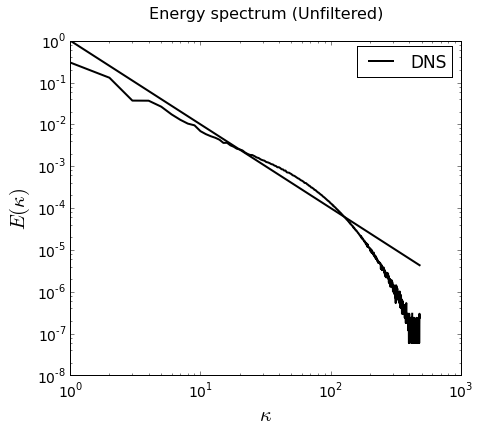

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
SIZE=12
plt.rc('font', size=SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SIZE+4)  # fontsize of the axes title
plt.rc('axes', labelsize=SIZE+8)  # fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE+2)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE+2)  # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE+5)   # legend fontsize
#plt.rc('figure', titlesize=SIZE+5)  # size of the figure title
plt.figure(figsize=(7,6))
symbPos=[1,4,16];lw=2;ms=10
plt.loglog(ks,ek,'-k',linewidth=lw,markersize=ms,fillstyle='full',label='DNS')
plt.loglog(ks,np.power(ks,-5/3),'-k',linewidth=2)
plt.xlabel('$\kappa$')
plt.ylabel('$E(\kappa)$')
plt.title('Energy spectrum (Unfiltered)\n')
plt.axis([0.0,1000.0, 1e-8,1.0e0])
plt.legend(loc=0,bbox_to_anchor=(1.0,1.01),ncol=1,fancybox=False,shadow=False)
#plt.legend(loc='outside', shadow=True) #loc='upper center'
ax = plt.gca()
ax.set_autoscale_on(False)
plt.show()

In [12]:
def GetFirstDer(cFld,kappa,N):
    cFld[kappa==(N//2)]=0 # see http://math.mit.edu/~stevenj/fft-deriv.pdf
    derFld=np.complex64(1.0j*kappa*cFld)
    return derFld

def GetSecondDer(cFld,kappa1,kappa2):
    derFld=GetFirstDer(GetFirstDer(cFld,kappa1),kappa2)
    return derFld
    
def GetThirdDer(cFld,kappa1,kappa2,kappa3):
    derFld=GetFirstDer(GetFirstDer(GetFirstDer(cFld,kappa1),kappa2),kappa3)
    return derFld

def GetFldInPhysSpace(cv,v,ifft_object):
    fld=GetIFFT3Dfield(cv,v,ifft_object)
    return fld.flatten()

In [13]:
t1=time.time()
rng=np.random.randint(nx*ny*nz,size=(nx*ny*nz)//8)
t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

Done!! Cost= 1.13 seconds


In [14]:
t1=time.time()
temp=ft.zeros_aligned((nx,ny,nz),dtype='float32')
t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

Done!! Cost= 1.15 seconds


In [15]:
t1=time.time()
cA=GetFirstDer(cu,kx,N)
A11=GetFldInPhysSpace(cA,temp,ifft_object)[rng]
cA=GetFirstDer(cu,ky,N)
A12=GetFldInPhysSpace(cA,temp,ifft_object)[rng]
cA=GetFirstDer(cu,kz,N)
A13=GetFldInPhysSpace(cA,temp,ifft_object)[rng]
cA=GetFirstDer(cv,kx,N)
A21=GetFldInPhysSpace(cA,temp,ifft_object)[rng]
cA=GetFirstDer(cv,ky,N)
A22=GetFldInPhysSpace(cA,temp,ifft_object)[rng]
cA=GetFirstDer(cv,kz,N)
A23=GetFldInPhysSpace(cA,temp,ifft_object)[rng]
cA=GetFirstDer(cw,kx,N)
A31=GetFldInPhysSpace(cA,temp,ifft_object)[rng]
cA=GetFirstDer(cw,ky,N)
A32=GetFldInPhysSpace(cA,temp,ifft_object)[rng]
cA=GetFirstDer(cw,kz,N)
A33=GetFldInPhysSpace(cA,temp,ifft_object)[rng]
t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f minutes\n' %((t2-t1)/60.0))

Done!! Cost= 2.56 minutes


In [3]:
Q = np.zeros((N,N,N),dtype='float32')
R = np.zeros((N,N,N),dtype='float32')

In [4]:
start = time.time()

nproc = 8
nx = N//nproc

lQ = np.zeros((N//nproc,N,N), dtype='float32')
lR = np.zeros((N//nproc,N,N), dtype='float32')

folder = '/home/jhelsas/scratch'

for k in range(nproc):
    filename = 'ref-Q-'+str(k)+'-(t=0.0).npz'
    files = folder+'/'+filename
    
    content = np.load(files)
    lQ = content['Q']
    
    Q[k*nx:(k+1)*nx,:,:] = lQ[:,:,:]
    
    filename = 'ref-R-'+str(k)+'-(t=0.0).npz'
    files = folder+'/'+filename
    
    content = np.load(files)
    lR = content['R']
    
    R[k*nx:(k+1)*nx,:,:] = lR[:,:,:]
    
end = time.time()
print(end-start)

15.8749849796


In [5]:
# Q=-(1/2)(SijSji+RijRji)
def GetQ(a11,a12,a13,a21,a22,a23,a31,a32,a33):
    if((len(a11.shape)>1)|(len(a12.shape)>1)|(len(a13.shape)>1)|(len(a21.shape)>1)|(len(a22.shape)>1)|\
        (len(a23.shape)>1)|(len(a31.shape)>1)|(len(a32.shape)>1)|(len(a33.shape)>1)):
        print('Change the input arrays of GetQ function to 1D!!')
        return 0
    #sijsji=s11*s11+s22*s22+s33*s33+2.0*(s12*s12+s13*s13+s23*s23)
    #rijrji=-2.0*(r12*r12+r23*r23+r13*r13)        
    sijsji=a11*a11+a22*a22+a33*a33+0.5*((a12+a21)**2+(a13+a31)**2+(a23+a32)**2)
    rijrji=-0.5*((a12-a21)**2+(a13-a31)**2+(a23-a32)**2)
    return -(1./2.)*(sijsji+rijrji)

# r=-(1/3)(SijSjkSki+3RijRjkSki)
def GetR(a11,a12,a13,a21,a22,a23,a31,a32,a33):
    if((len(a11.shape)>1)|(len(a12.shape)>1)|(len(a13.shape)>1)|(len(a21.shape)>1)|(len(a22.shape)>1)|\
        (len(a23.shape)>1)|(len(a31.shape)>1)|(len(a32.shape)>1)|(len(a33.shape)>1)):
        print('Change the input arrays of GetR function to 1D!!')
        return 0
    #SijSjkSki=s11*s11*s11+s22*s22*s22+s33*s33*s33+3.0*(s12*s12*(s11+s22)+s13*s13*(s11+s33)+s23*s23*(s22+s33))+6.0*s12*s23*s13
    #RijRjkSki=-r12*r12*(s11+s22)-r13*r13*(s11+s33)-r23*r23*(s22+s33)-2.*s23*r12*r13-2.*s12*r13*r23+2.*s13*r12*r23        
    SijSjkSki=a11**3+a22**3+a33**3+0.75*((a12+a21)**2*(a11+a22)+(a13+a31)**2*(a11+a33)+(a23+a32)**2*(a22+a33))\
    +0.75*(a12+a21)*(a13+a31)*(a23+a32)
    RijRjkSki=-0.25*((a12-a21)**2*(a11+a22)+(a13-a31)**2*(a11+a33)+(a23-a32)**2*(a22+a33))\
    -0.25*((a23+a32)*(a12-a21)*(a13-a31)+(a12+a21)*(a13-a31)*(a23-a32)-(a13+a31)*(a12-a21)*(a23-a32))
    return -(1./3.)*(SijSjkSki+3.*RijRjkSki)

# Ref: Ooi et.al.(1999),JFM,"A study of the evolution and characteristics..."
# Qw=-(1/2)RijRji [used for normalizing the Q and R]
def GetQwAvg(a12,a21,a13,a31,a23,a32):
    if((len(a12.shape)>1)|(len(a13.shape)>1)|(len(a21.shape)>1)|\
        (len(a23.shape)>1)|(len(a31.shape)>1)|(len(a32.shape)>1)):
        print('Change the input arrays of GetQwAvg function to 1D!!')
        return 0
    #Qw=r12*r12+r13*r13+r23*r23
    Qw=0.25*((a12-a21)**2+(a13-a31)**2+(a23-a32)**2)
    Qw_avg=np.average(Qw)
    return Qw_avg

def FindJointPDF(x,y,lowerLim_x,upperLim_x,lowerLim_y,upperLim_y,bins_x,bins_y):
    x=x.flatten()
    y=y.flatten()
    totL=len(x)
    xedges=np.linspace(lowerLim_x,upperLim_x,bins_x+1,endpoint=True); dx=xedges[1]-xedges[0]
    yedges=np.linspace(lowerLim_y,upperLim_y,bins_y+1,endpoint=True); dy=yedges[1]-yedges[0]
    jPDF,xedges,yedges=np.histogram2d(x,y,bins=(xedges,yedges))
    jPDF=jPDF/(dx*dy*totL)
    gridX,gridY=np.meshgrid(xedges[0:-1]+0.5*dx,yedges[0:-1]+0.5*dy)
    return jPDF.T,gridX,gridY

In [6]:
def GetQsimple(a11,a12,a13,a21,a22,a23,a31,a32,a33):
    Qs=a11**2 + a22**2 + a33**2 + 2.*a12*a21 + 2.*a13*a31 + 2.*a23*a32
    return -(1./2.)*Qs

def GetRsimple(a11,a12,a13,a21,a22,a23,a31,a32,a33):
    Rs = a11*a22*a33 + a21*a32*a13 + a31*a12*a23 - a13*a22*a31 - a11*a32*a23 - a21*a12*a33
    return -Rs

In [27]:
t1=time.time()

qwAvg=GetQwAvg(A12,A21,A13,A31,A23,A32)
print(2*qwAvg)

t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

249.208053589
Done!! Cost= 2.09 seconds


In [13]:
qwAvg = 2*124.609298706

In [8]:
t1=time.time()
q=GetQ(A11,A12,A13,A21,A22,A23,A31,A32,A33)
r=GetR(A11,A12,A13,A21,A22,A23,A31,A32,A33)
q=q/qwAvg
r=r/(qwAvg**1.5)
t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

NameError: name 'A11' is not defined

In [14]:
t1=time.time()

rng=np.random.randint(nx*ny*nz,size=(nx*ny*nz)//8)

t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

Done!! Cost= 0.18 seconds


In [15]:
t1=time.time()
q=Q.flatten()[rng]
r=R.flatten()[rng]
q=q/qwAvg
r=r/(qwAvg**1.5)
t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

Done!! Cost= 3.98 seconds


In [20]:
t1=time.time()
qsimple=GetQsimple(A11,A12,A13,A21,A22,A23,A31,A32,A33)
rsimple=GetRsimple(A11,A12,A13,A21,A22,A23,A31,A32,A33)
qsimple=qsimple/qwAvg
rsimple=rsimple/(qwAvg**1.5)
t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

Done!! Cost= 7.94 seconds


In [16]:
t1=time.time()
Ngrid=400;rmin=-25.0;rmax=25.0;qmin=-25.0;qmax=25.0 # Constants for jPDF
jPDF,gridX,gridY=FindJointPDF(r.flatten(),q.flatten(),rmin,rmax,qmin,qmax,Ngrid,Ngrid)
t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

Done!! Cost= 3.70 seconds


In [22]:
t1=time.time()
Ngrid=400;rmin=-25.0;rmax=25.0;qmin=-25.0;qmax=25.0 # Constants for jPDF
jPDFsimple,gridX,gridY=FindJointPDF(rsimple.flatten(),qsimple.flatten(),rmin,rmax,qmin,qmax,Ngrid,Ngrid)
t2=time.time()
sys.stdout.write('Done!! Cost= %0.2f seconds\n' %(t2-t1))

Done!! Cost= 29.57 seconds


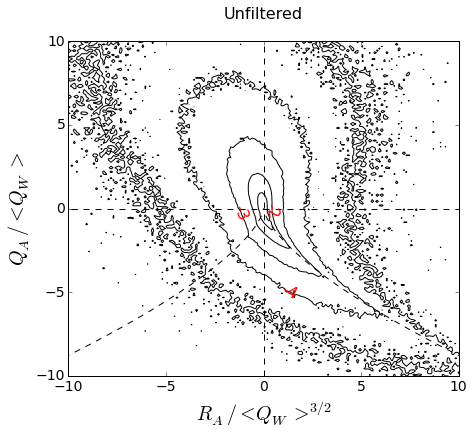

In [17]:
%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

fmt={}
plt.figure()
SIZE=12
plt.rc('font', size=SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SIZE+4)  # fontsize of the axes title
plt.rc('axes', labelsize=SIZE+8)  # fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE+2)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE+2)  # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)  # legend fontsize
plt.figure(figsize=(7,6))
levels=np.logspace(-5.,-1,num=5,base=10.0)#np.logspace[1e-5,1e-4,1e-3,1e-2,1e-1]
CS=plt.contour(gridX,gridY,jPDF,levels,colors='k')#[1::2] #extent=(-15,15,-15,15)
strs=['-5','-4','-3','-2','-1']
for l,s in zip(CS.levels,strs):
    fmt[l]=s
plt.clabel(CS,levels,inline=False,fmt=fmt,fontsize=16,colors='r')
#plt.colorbar()

# lines
Qc=np.linspace(qmin,0,50)
Rc1=-(2./27.)*((-3.*Qc)**1.5)
Rc2=(2./27.)*((-3.*Qc)**1.5)
plt.plot(Rc1,Qc,'--k')
plt.plot(Rc2,Qc,'--k')
plt.plot([0,0],[qmin,qmax],'--k')
plt.plot([rmin,rmax],[0,0],'--k')
plt.axis([-10,10,-10,10])#rmin,rmax,qmin,qmax
plt.xlabel('$R_A/<Q_W>^{3/2}$')#/\langle Q_W\rangle^{3/2}
plt.ylabel('$Q_A/<Q_W>$')#/\langle Q_W\rangle
plt.title('Unfiltered\n')
plt.show()

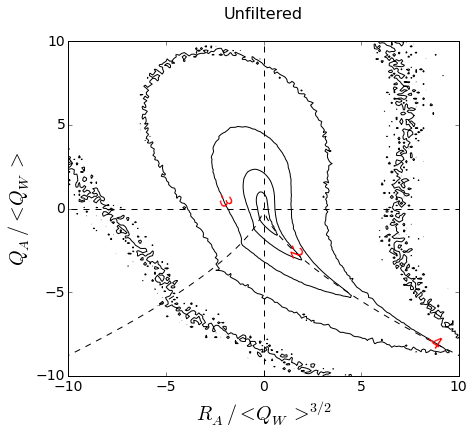

In [24]:
%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

fmt={}
plt.figure()
SIZE=12
plt.rc('font', size=SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SIZE+4)  # fontsize of the axes title
plt.rc('axes', labelsize=SIZE+8)  # fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE+2)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE+2)  # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)  # legend fontsize
#plt.rc('figure', titlesize=SIZE+4)  # # size of the figure title
plt.figure(figsize=(7,6))
levels=np.logspace(-5.,-1,num=5,base=10.0)#np.logspace[1e-5,1e-4,1e-3,1e-2,1e-1]
CS=plt.contour(gridX,gridY,jPDFsimple,levels,colors='k')#[1::2] #extent=(-15,15,-15,15)
strs=['-5','-4','-3','-2','-1']
for l,s in zip(CS.levels,strs):
    fmt[l]=s
plt.clabel(CS,levels,inline=False,fmt=fmt,fontsize=16,colors='r')
#plt.colorbar()

# lines
Qc=np.linspace(qmin,0,50)
Rc1=-(2./27.)*((-3.*Qc)**1.5)
Rc2=(2./27.)*((-3.*Qc)**1.5)
plt.plot(Rc1,Qc,'--k')
plt.plot(Rc2,Qc,'--k')
plt.plot([0,0],[qmin,qmax],'--k')
plt.plot([rmin,rmax],[0,0],'--k')
plt.axis([-10,10,-10,10])#rmin,rmax,qmin,qmax
plt.xlabel('$R_A/<Q_W>^{3/2}$')#/\langle Q_W\rangle^{3/2}
plt.ylabel('$Q_A/<Q_W>$')#/\langle Q_W\rangle
plt.title('Unfiltered\n')
plt.show()

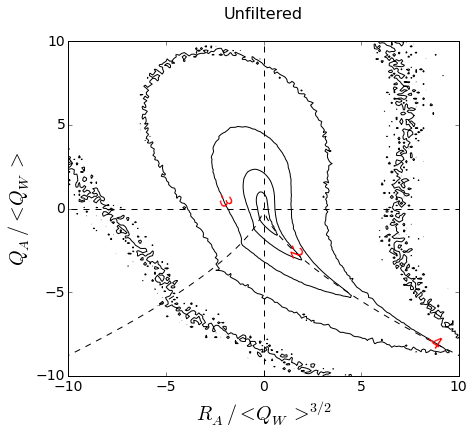

In [33]:
%matplotlib inline
import matplotlib
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

fmt={}
plt.figure()
SIZE=12
plt.rc('font', size=SIZE)  # controls default text sizes
plt.rc('axes', titlesize=SIZE+4)  # fontsize of the axes title
plt.rc('axes', labelsize=SIZE+8)  # fontsize of the x any y labels
plt.rc('xtick', labelsize=SIZE+2)  # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE+2)  # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)  # legend fontsize
#plt.rc('figure', titlesize=SIZE+4)  # # size of the figure title
plt.figure(figsize=(7,6))
levels=np.logspace(-5.,-1,num=5,base=10.0)#np.logspace[1e-5,1e-4,1e-3,1e-2,1e-1]
CS=plt.contour(gridX,gridY,jPDFsimple,levels,colors='k')#[1::2] #extent=(-15,15,-15,15)
strs=['-5','-4','-3','-2','-1']
for l,s in zip(CS.levels,strs):
    fmt[l]=s
plt.clabel(CS,levels,inline=False,fmt=fmt,fontsize=16,colors='r')
#plt.colorbar()

# lines
Qc=np.linspace(qmin,0,50)
Rc1=-(2./27.)*((-3.*Qc)**1.5)
Rc2=(2./27.)*((-3.*Qc)**1.5)
plt.plot(Rc1,Qc,'--k')
plt.plot(Rc2,Qc,'--k')
plt.plot([0,0],[qmin,qmax],'--k')
plt.plot([rmin,rmax],[0,0],'--k')
plt.axis([-10,10,-10,10])#rmin,rmax,qmin,qmax
plt.xlabel('$R_A/<Q_W>^{3/2}$')#/\langle Q_W\rangle^{3/2}
plt.ylabel('$Q_A/<Q_W>$')#/\langle Q_W\rangle
plt.title('Unfiltered\n')
plt.show()